- Training large models like LLaMA2, Zephyr, or Mistral on Google Colab's GPU can be challenging due to the limited resources and memory constraints. Here's a brief analysis of each model's requirements:<br><br>

**LLaMA2:**  

This model has approximately 1.4 billion parameters, which requires a significant amount of memory and computational resources.<br><br>


**Zephyr:**

Zephyr is a large language model with around 2.5 billion parameters, making it even more resource-intensive than LLaMA2.<br><br>

**Mistral:**

Mistral is a massive model with around 5 billion parameters, which is one of the largest language models available.<br><br>


Google Colab's GPU resources are limited, and training these models might not be feasible or would require significant modifications to the training script. Here are some limitations to consider:<br><br>

**GPU Memory:**

Colab's GPU has 16 GB of VRAM, which might not be enough to hold the model's parameters and the input data.<br><br>


**Compute Resources:**

Colab's GPU has a limited number of CUDA cores and memory bandwidth, which can slow down the training process.<br><br>

If you still want to try training these models on Colab, here are some possible workarounds:<br><br>

**Model parallelism:**

You can try to split the model across multiple GPUs using model parallelism techniques, such as torch.distributed or transformers' built-in parallelism features. This would require significant modifications to the training script.<br><br>

**Gradient checkpointing:**

You can use gradient checkpointing to reduce the memory requirements during training. This technique saves only the gradients of the model's parameters at certain intervals, reducing the memory footprint.<br><br>


**Mixed precision training:**

You can use mixed precision training, which uses lower precision data types (e.g., float16) for the model's parameters and activations, reducing the memory requirements.
However, even with these workarounds, training these large models on Colab's GPU might not be feasible or would require an impractically long time.

Estimated training time on Colab's GPU:

Assuming you can modify the training script to accommodate the model's size, here are rough estimates of the training time on Colab's GPU:

      LLaMA2: 1-2 weeks (depending on the batch size and sequence length)
      Zephyr: 2-4 weeks (depending on the batch size and sequence length)
      Mistral: 4-8 weeks (depending on the batch size and sequence length)


Keep in mind that these estimates are rough and might not be accurate, as the training time depends on many factors, including the model's architecture, dataset size, batch size, and sequence length.<br><br>

**Alternate options:**

If you cannot train these models on Colab's GPU, consider the following alternatives:

**Cloud services:**
- Use cloud services like AWS, Google Cloud, or Microsoft Azure, which offer more powerful GPU instances with larger memory and compute resources.<br><br>


**Local machine:**

- If you have a powerful local machine with a high-end GPU (e.g., NVIDIA V100 or A100), you can train the models locally.<br><br>


**Distributed training:**

- Use distributed training frameworks like transformers' Trainer with DistributedDataParallel or torch.distributed to train the models on multiple machines or GPUs.<br><br>

**Pre-trained models:**

- If you don't need to fine-tune the models from scratch, you can use pre-trained models available on the Hugging Face model hub, which can save you a significant amount of time and resources.

**Transfer Learning:**<br><br>


- In transfer learning, a pre-trained model (often trained on a large dataset) is used as a starting point for a new task. The weights of the pre-trained model are initialized based on its previous training.
During transfer learning, the model is typically adapted to the new task by adjusting its weights using a smaller learning rate than during the initial training. This allows the model to fine-tune its parameters to better suit the characteristics of the new task.<br><br>
- The degree of adjustment to the weights in transfer learning may vary depending on the similarity between the original task and the new task. If the tasks are closely related, the weights may require only minor adjustments to perform well on the new task.<br><br>


**Fine-Tuning:**<br><br>


- Fine-tuning is a specific form of transfer learning where the pre-trained model's parameters are further adjusted (fine-tuned) on a new dataset or task.<br><br>

- In fine-tuning, the weights of the pre-trained model are updated more extensively compared to transfer learning. The entire model (or a portion of it) is trained on the new dataset, and the learning rate used for updating the weights may be smaller than during the initial training but larger than in transfer learning.<br><br>


- Fine-tuning allows the model to adapt more closely to the specifics of the new task, potentially resulting in better performance on the task compared to transfer learning alone.<br><br>


In summary, while both transfer learning and fine-tuning involve adjusting the weights of a pre-trained model for a new task, fine-tuning typically involves more extensive weight adjustments and training on the new dataset. Transfer learning may involve less extensive adjustments, but it still adapts the pre-trained model to the characteristics of the new task to some degree.

# What is the difference between fine-tuning and parameter-efficient fine-tuning?

- Fine-tuning and parameter-efficient fine-tuning are two approaches used in machine learning to improve the performance of pre-trained models on a specific task.<br><br>

- Fine-tuning is taking a pre-trained model and training it further on a new task with new data. The entire pre-trained model is usually trained in fine-tuning, including all its layers and parameters. This process can be computationally expensive and time-consuming, especially for large models.<br><br>

- On the other hand, parameter-efficient fine-tuning is a method of fine-tuning that focuses on training only a subset of the pre-trained model’s parameters. This approach involves identifying the most important parameters for the new task and only updating those parameters during training. Doing so, PEFT can significantly reduce the computation required for fine-tuning.

In [ ]:
from PIL import Image
from IPython.display import display

def display_image(image_path):
    try:
        img = Image.open(image_path)
        display(img)
    except Exception as e:

        print("Error:", e)

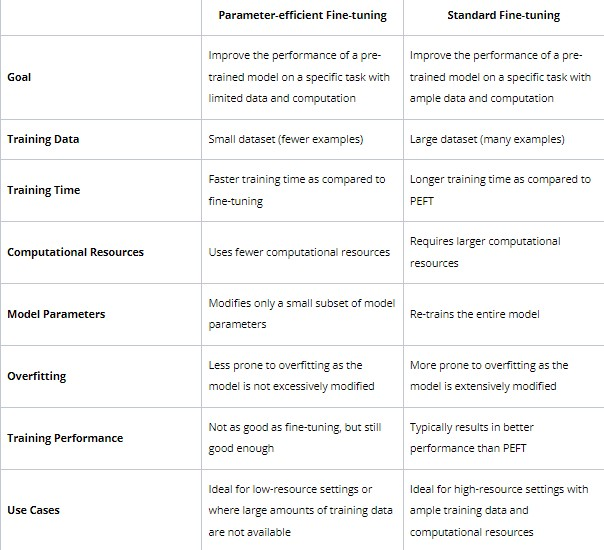

In [ ]:
display_image('download.png')

# Parameter-efficient fine-tuning techniques

**Adapter**<br><br>

- Adapters are a special type of submodule that can be added to pre-trained language models to modify their hidden representation during fine-tuning. By inserting adapters after the multi-head attention and feed-forward layers in the transformer architecture, we can update only the parameters in the adapters during fine-tuning while keeping the rest of the model parameters frozen.

- Adopting adapters can be a straightforward process. All that is required is to add adapters into each transformer layer and place a classifier layer on top of the pre-trained model. By updating the parameters of the adapters and the classifier head, we can improve the performance of the pre-trained model on a particular task without updating the entire model. This approach can save time and computational resources while still producing impressive results.



**LoRA**<br><br>

- Low-Rank Adaptation (LoRA) of large language models is another approach in the area of fine-tuning models for specific tasks or domains. Similar to the adapters, LoRA is also a small trainable submodule that can be inserted into the transformer architecture. It involves freezing the pre-trained model weights and injecting trainable rank decomposition matrices into each layer of the transformer architecture, greatly diminishing the number of trainable parameters for downstream tasks. This method can minimize the number of trainable parameters by up to 10,000 times and the GPU memory necessity by 3 times while still performing on par or better than fine-tuning model quality on various tasks. LoRA also allows for more efficient task-switching, lowering the hardware barrier to entry, and has no additional inference latency compared to other methods.

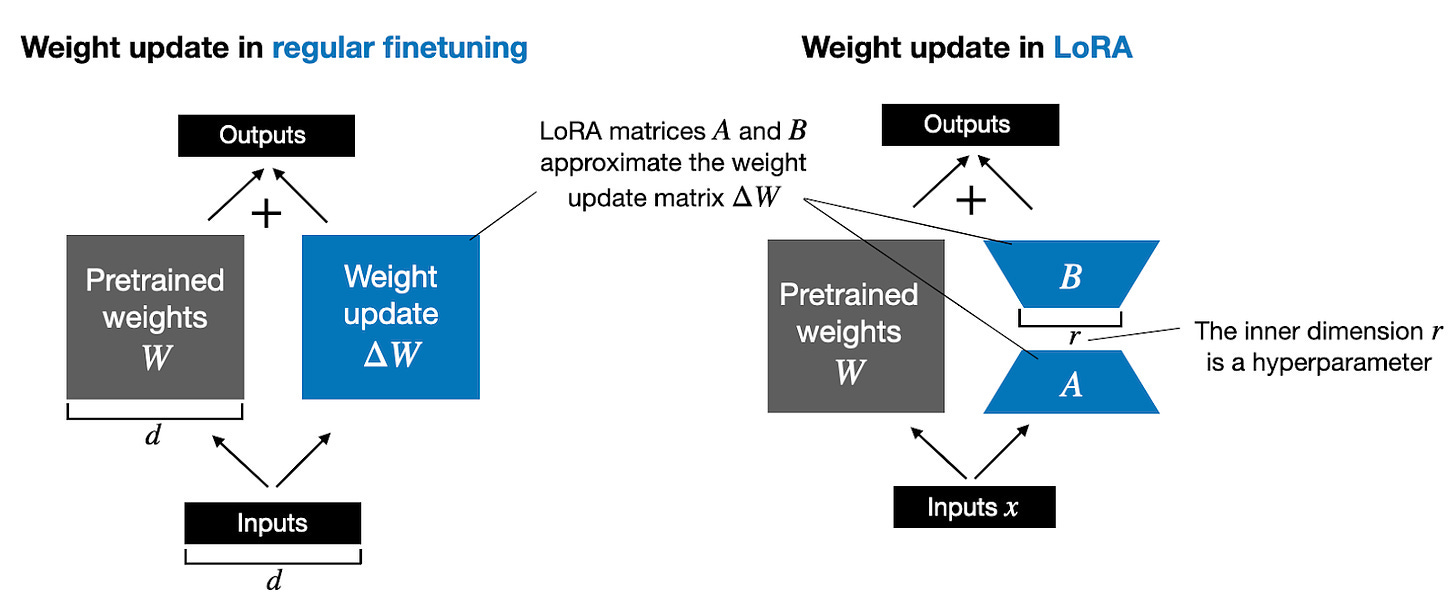

In [ ]:
display_image('download4.jpg')

# Fine-tune Llama 3 with ORPO

ORPO is a new exciting fine-tuning technique that combines the traditional supervised fine-tuning and preference alignment stages into a single process. This reduces the computational resources and time required for training. Moreover, empirical results demonstrate that ORPO outperforms other alignment methods on various model sizes and benchmarks.


- There are now many methods to align large language models (LLMs) with human preferences. Reinforcement learning with human feedback (RLHF) was one of the first and brought us ChatGPT, but RLHF is very costly. DPO**(Differentiable Preference Optimization)**, IPO**(Interactive Preference Optimization)**, and KTO **(Knowledge Transfer Optimization)** are notably cheaper than RLHF as they don’t need a reward model.<br><br>

- While DPO and IPO are cheaper, they still require to train two different models. One model for the supervised fine-tuning (SFT) step, i.e., training the model to answer instructions, and then the model to align with human preferences using the SFT model for initialization and as a reference.<br><br>

- ORPO is yet another new method for LLM alignment but this one doesn’t even need the SFT model. With ORPO, the LLM jointly learns to answer instructions and human preferences.



# [ORPO: Monolithic Preference Optimization without Reference Model](https://arxiv.org/abs/2403.07691)

# ORPO

Instruction tuning and preference alignment are essential techniques for adapting Large Language Models (LLMs) to specific tasks. Traditionally, this involves a multi-stage process: 1/ Supervised Fine-Tuning (SFT) on instructions to adapt the model to the target domain, followed by 2/ preference alignment methods like Reinforcement Learning with Human Feedback (RLHF) or Direct Preference Optimization (DPO) to increase the likelihood of generating preferred responses over rejected ones.

In [ ]:
display_image('download1.png')

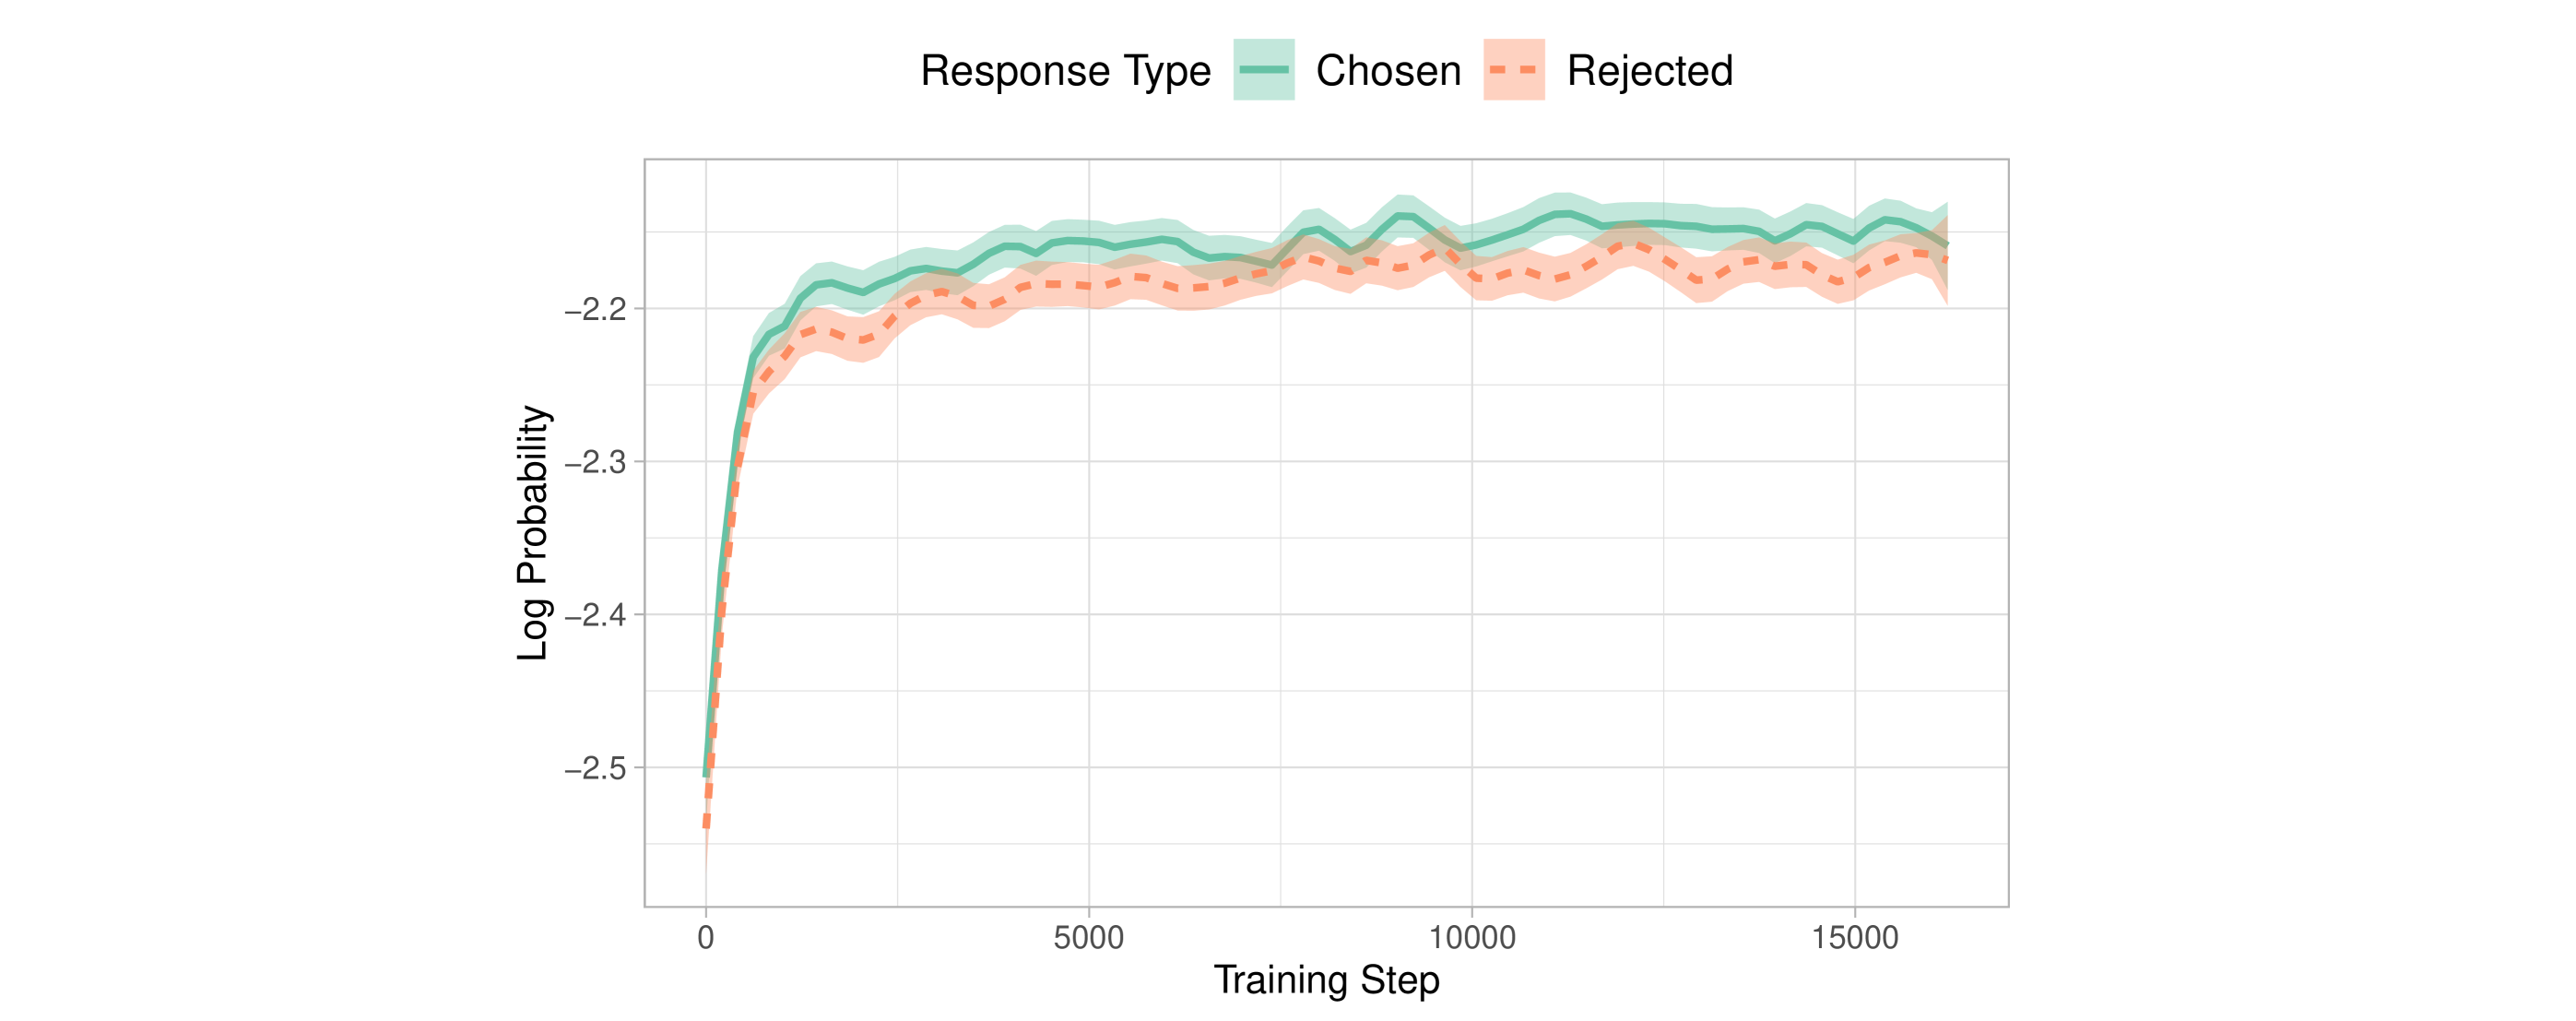

In [ ]:
display_image('download2.png')

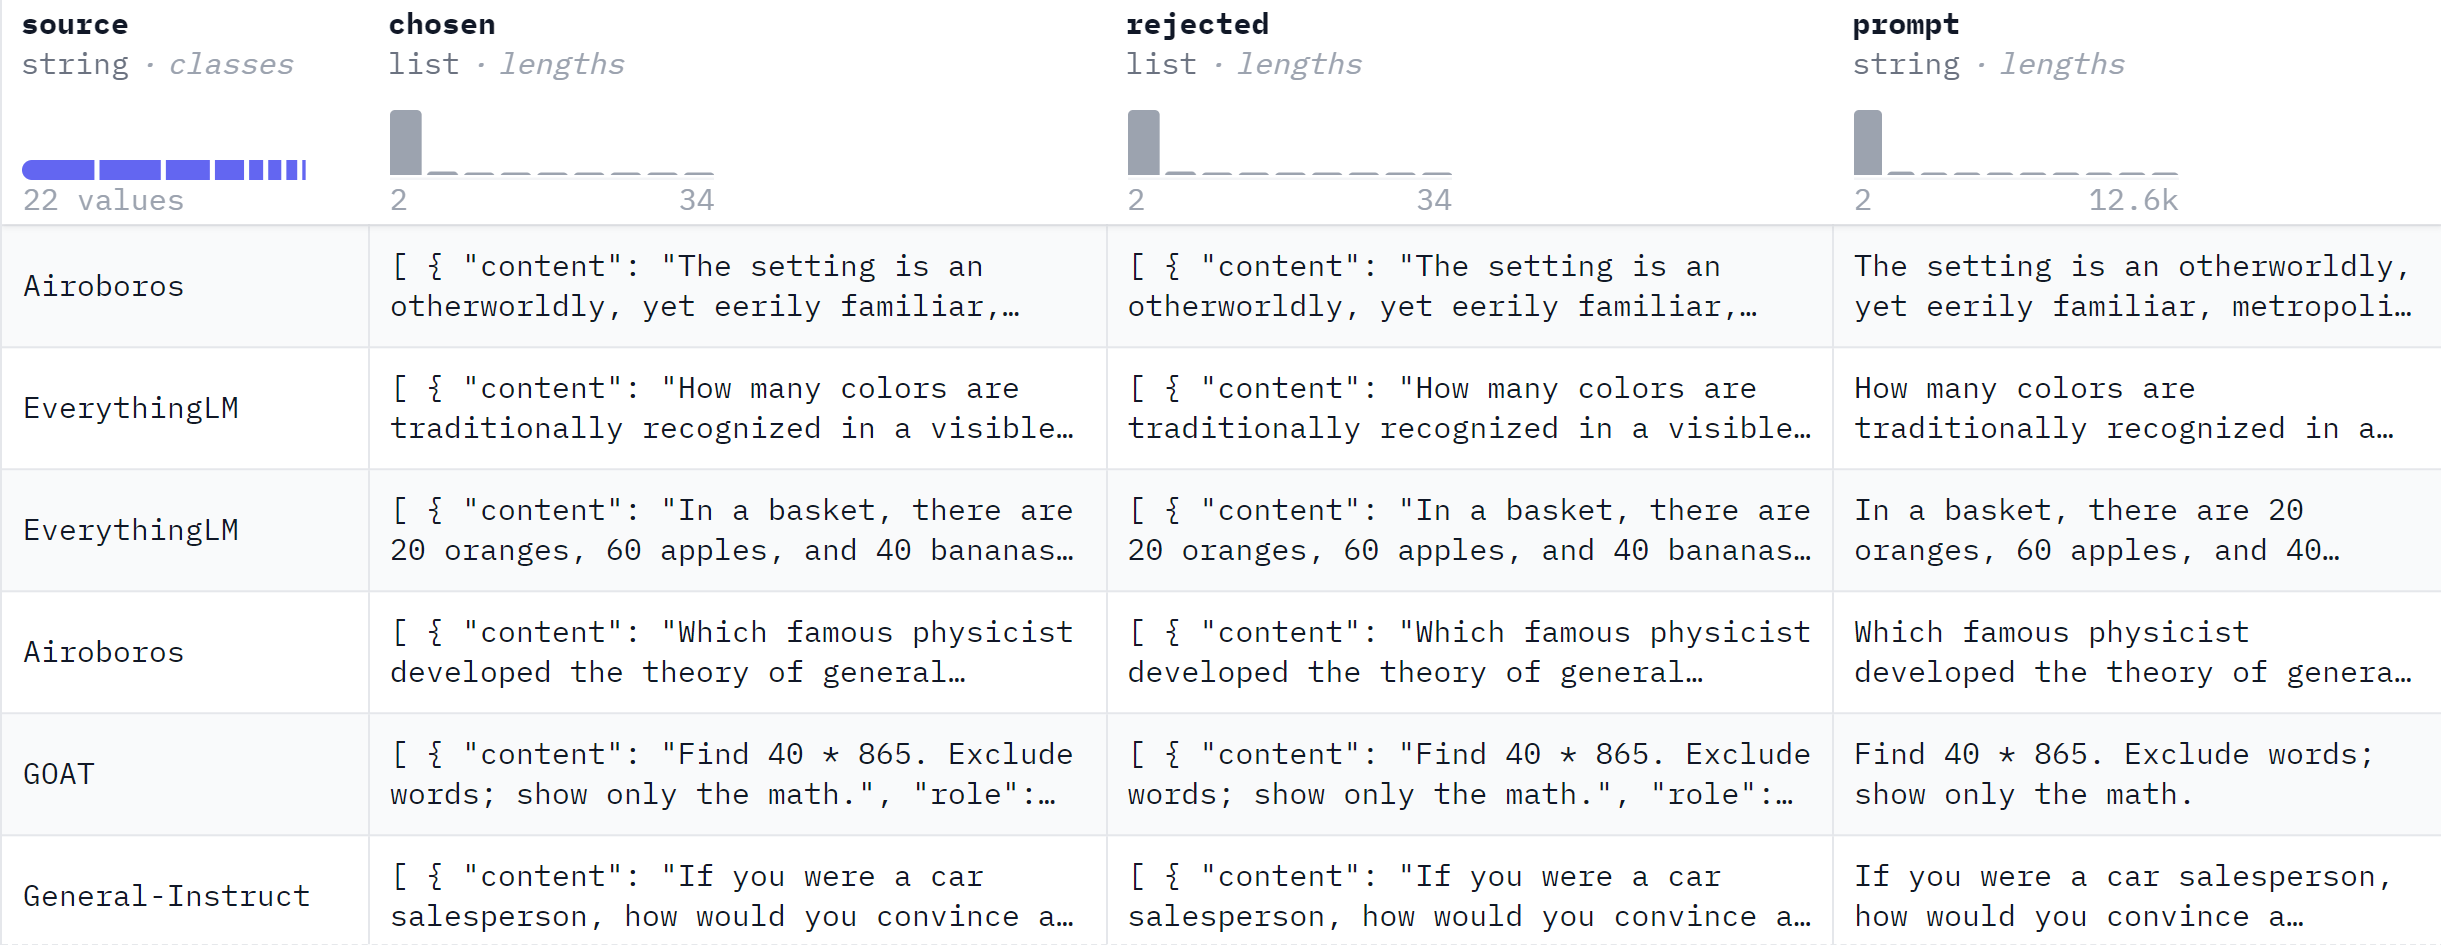

In [ ]:
display_image('download3.png')

In [1]:
!pip install -U transformers datasets accelerate peft trl bitsandbytes wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#**Accelerate**



Accelerate is a library that provides a set of tools to accelerate the training of deep learning models. It's designed to work seamlessly with popular deep learning frameworks like PyTorch and TensorFlow.

Accelerate provides several features to speed up training, including:

**Mixed precision training:**

- Accelerate allows you to use lower precision data types (e.g., float16) for model weights and activations, which can significantly reduce memory usage and improve training speed.<br><br>


**Gradient checkpointing:**

- Accelerate provides a gradient checkpointing mechanism that allows you to store only the gradients of the model's parameters at certain intervals, reducing memory usage and improving training speed.<br><br>


**Distributed training:**

- Accelerate provides a distributed training framework that allows you to scale your training process across multiple machines, making it ideal for large-scale deep learning models

#**Wandb:**<br><br>

- The Weights & Biases library (wandb) is a tool for visualizing and tracking machine learning experiments. It provides features for logging model training metrics, visualizing training progress with interactive charts, and comparing experiments across different runs. It's commonly used by researchers and practitioners to monitor and analyze the performance of their machine learning models.

#**TRL - Transformer Reinforcement Learning**

- TRL is a full stack library where we provide a set of tools to train transformer language models with Reinforcement Learning, from the Supervised Fine-tuning step (SFT), Reward Modeling step (RM) to the Proximal Policy Optimization (PPO) step. <br><br>



**Model Classes:**

A brief overview of what each public model class does.<br><br>


**SFTTrainer:**

Supervise Fine-tune your model easily with SFTTrainer<br><br>


**RewardTrainer:**

Train easily your reward model using RewardTrainer.<br><br>


**PPOTrainer:**

Further fine-tune the supervised fine-tuned model using PPO algorithm
Best-of-N Sampling: Use best of n sampling as an alternative way to sample predictions from your active model<br><br>


**DPOTrainer:**


Direct Preference Optimization training using DPOTrainer.
TextEnvironment: Text environment to train your model using tools with RL.

#**BitsAndBytes**

**Optimizers:**<br><br>


- Optimizers are algorithms used to adjust the parameters of a machine learning model during training in order to minimize the error or loss function. These algorithms play a crucial role in the training process by determining how the model's parameters are updated based on the gradients of the loss function with respect to those parameters.<br><br>

- Common optimization algorithms include stochastic gradient descent (SGD), Adam, RMSprop, and Adagrad, among others. Each optimizer has its own update rules and hyperparameters that influence the training dynamics and convergence properties of the model.<br><br>


Example:

Suppose you're training a neural network for image classification. During each training iteration, the optimizer computes the gradients of the loss function with respect to the model's parameters and updates the parameters accordingly to minimize the classification error.

**Precision:**<br><br>


- Precision refers to the level of numerical accuracy or representation used to store and process data in a computational system. In the context of machine learning and optimization, precision often refers to the number of bits used to represent numerical values, particularly floating-point numbers.<br><br>

- Higher precision allows for greater numerical accuracy but requires more memory and computational resources. Conversely, lower precision reduces memory usage and computational overhead but may introduce quantization errors or numerical instability.<br><br>


- Precision is commonly expressed in terms of the number of bits used to represent numerical values, such as 16-bit (half precision), 32-bit (single precision), or 64-bit (double precision).<br><br>


Example:

In training neural networks, the weights, biases, and gradients are typically represented using 32-bit floating-point numbers (float32) for high precision. However, for memory-constrained environments or specialized hardware accelerators, lower precision formats like 16-bit floating-point numbers (float16) or even 8-bit integers (int8) may be used to reduce memory consumption and improve computational efficiency while still achieving acceptable performance.

#**BitsAndBytes**

- The bitsandbytes library provides functionalities for reducing memory consumption in large language models (LLMs) using k-bit quantization techniques. <br><br>

Let's break down each feature and explain them with examples:<br><br>

**8-bit Optimizers:**<br><br>


- This feature utilizes block-wise quantization to maintain 32-bit performance while significantly reducing memory consumption. It optimizes the memory usage of the optimizer during training.


Example:

Suppose you're training a large language model using PyTorch with a 32-bit optimizer. By using bitsandbytes's 8-bit optimizer feature, you can quantize the optimizer to use only 8 bits for certain operations, dramatically reducing memory usage without sacrificing performance.<br><br>


**LLM.Int() or 8-bit Quantization for Inference:**<br><br>


- This feature enables large language model inference with only half the required memory and without any performance degradation. It achieves this by quantizing most features to 8 bits and separately treating outliers with 16-bit matrix multiplication.

Example:

You have a pre-trained language model like BERT, which requires significant memory for inference due to its large size. By applying bitsandbytes's LLM.Int() feature, you can quantize the model's parameters to 8 bits, reducing the memory required for inference while maintaining performance.<br><br>


**QLoRA or 4-bit Quantization for Training:**<br><br>


- This feature enables large language model training with memory-saving techniques that do not compromise performance. It quantizes the model to 4 bits and inserts a small set of trainable low-rank adaptation (LoRA) weights to allow training.


Example:

You want to fine-tune a large language model on a specific task, but memory constraints make it challenging. By using bitsandbytes's QLoRA feature, you can quantize the model to 4 bits and introduce LoRA weights, reducing memory usage during training without sacrificing performance.

In [2]:
import gc
import os

import torch
#import wandb
from datasets import load_dataset
from google.colab import userdata
from peft import LoraConfig, PeftModel, prepare_model_for_kbit_training
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    pipeline,
)
from trl import ORPOConfig, ORPOTrainer, setup_chat_format

#wb_token = userdata.get('wandb')
#wandb.login(key=wb_token)


In [3]:
if torch.cuda.get_device_capability()[0] >= 8:
    !pip install -qqq flash-attn
    attn_implementation = "flash_attention_2"
    torch_dtype = torch.bfloat16
else:
    attn_implementation = "eager"
    torch_dtype = torch.float16


- The condition torch.cuda.get_device_capability()[0] >= 8 checks if the CUDA compute capability of the GPU is greater than or equal to 8.<br><br>

- CUDA capability 8 refers to GPUs with the Ampere architecture, which introduced significant improvements in performance, efficiency, and feature support compared to previous architectures.

- **torch.float16** represents 16-bit floating-point numbers (half precision), which offer lower precision but require less memory compared to 32-bit floating-point numbers (float32).<br><br>


- **torch.bfloat16** represents 16-bit floating-point numbers using the bfloat16 format, which provides greater precision than float16 for certain operations while still offering memory savings compared to float32.

In the following, we will load the Llama 3 8B model in 4-bit precision thanks to bitsandbytes. We then set the LoRA configuration using PEFT for QLoRA. I'm also using the convenient setup_chat_format() function to modify the model and tokenizer for ChatML support. It automatically applies this chat template, adds special tokens, and resizes the model's embedding layer to match the new vocabulary size.

In [4]:
from huggingface_hub import login
login()

In [5]:
# Model
base_model = "meta-llama/Meta-Llama-3-8B"
new_model = "OrpoLlama-3-8B"

# QLoRA config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch_dtype,
    bnb_4bit_use_double_quant=True,
)

# LoRA config
peft_config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=['up_proj', 'down_proj', 'gate_proj', 'k_proj', 'q_proj', 'v_proj', 'o_proj']
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(base_model)

# Load model
model = AutoModelForCausalLM.from_pretrained(
    base_model,
    quantization_config=bnb_config,
    device_map="auto",
    attn_implementation=attn_implementation
)
model, tokenizer = setup_chat_format(model, tokenizer)
model = prepare_model_for_kbit_training(model)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/177 [00:00<?, ?B/s]

[Link to understand Quantization](https://www.kaggle.com/code/lorentzyeung/what-s-4-bit-quantization-how-does-it-help-llama2)

**bnb_4bit_quant_type:**

- NF4 (NormalFloat) is a 4-bit data type used in machine learning, which normalizes each weight to a value between -1 and 1 for a more accurate representation of the lower precision weight. It is an enhancement of the Quantile Quantization technique and has shown better results than both 4-bit Integers and 4-bit Floats. NF4 can also be coupled with Double-Quantization (DQ) for higher compression while maintaining performance.<br><br>

**bnb_4bit_use_double_quant**


- DQ encompasses two quantization phases; initially, quantization constants are processed, which are then used as inputs for the subsequent quantization, yielding FP32 and FP8 values. This method avoids any performance drop, while saving an average of about 0.37 bits per parameter (approximately 3 GB for a 65B model). The recent integration of bitsandbytes, which incorporates findings from the QLoRA paper (including NF4 and DQ), shows virtually no reduction in performance with 4-bit quantization for both inferring and training large language models. NF4 and Double Quantization can be leveraged using the bitsandbytes library which is integrated inside the transformers library. Here is an example of how to easily load and quantize any Hugging Face model using the bitsandbytes library:

**bnb_4bit_compute_dtype:**<br><br>

- This parameter specifies the data type to be used for computation during training or inference with 4-bit quantized parameters. It is set based on the conditional logic in the previous code snippet, where torch_dtype is determined.
In the provided example, torch_dtype could be either torch.bfloat16 or torch.float16, depending on the CUDA device capability.

The LoraConfig class is used to configure the LoRa (Layer-wise Relevance Analysis) technique for fine-tuning large language models. <br><br>

The parameters in the peft_config object are as follows:<br><br>


**r:**

- The r parameter specifies the rank of the LoRA projection matrix. This parameter controls the number of parameters used for fine-tuning. A higher rank leads to more parameters and potentially better performance, but it also increases the memory footprint of the model<br><br>


**lora_alpha:**

- The lora_alpha parameter controls the scale of the LoRA projection matrix.
You can use this parameter to adjust the learning rate for the fine-tuning process. For optimal results, set it to double the value of r.<br><br>


**lora_dropout:**

-  The lora_dropout parameter specifies the dropout rate for the LoRA projection matrix.
This parameter can help prevent overfitting and enhance the model’s generalization ability.<br><br>


**bias:**

- The bias parameter specifies whether to use a bias term in the LoRA projection matrix. Setting this to “none” implies that no bias term will be used.<br><br>


**task_type:**

- The task_type parameter specifies the type of task the model will be used for. In this case, the task type is set to “CAUSAL_LM”, indicating that the model will be used for causal language modeling.<br><br>

**target_modules:**

-  The list of modules in the model to apply the LoRa technique to. This parameter specifies the modules where the adapter matrices will be added.

In [6]:
dataset_name = "mlabonne/orpo-dpo-mix-40k"
dataset = load_dataset(dataset_name, split="all")
dataset = dataset.shuffle(seed=42).select(range(10))

def format_chat_template(row):
    row["chosen"] = tokenizer.apply_chat_template(row["chosen"], tokenize=False)
    row["rejected"] = tokenizer.apply_chat_template(row["rejected"], tokenize=False)
    return row

dataset = dataset.map(
    format_chat_template,
    num_proc= os.cpu_count(),
)
dataset = dataset.train_test_split(test_size=0.01)


README.md:   0%|          | 0.00/3.53k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/127M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44245 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/multiprocess/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Map (num_proc=2):   0%|          | 0/10 [00:00<?, ? examples/s]

In [7]:
orpo_args = ORPOConfig(
    learning_rate=8e-6,
    beta=0.1,
    lr_scheduler_type="linear",
    max_length=1024,
    max_prompt_length=512,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=2,  # Reduced for less memory use
    optim="paged_adamw_8bit",
    num_train_epochs=1,
    evaluation_strategy="steps",
    eval_steps=100,  # Increased evaluation frequency
    logging_steps=10,  # Reduced logging frequency
    warmup_steps=20,  # Increased for better stability
    report_to="wandb",
    output_dir="./results/",
    fp16=True,  # Enable mixed precision here if supported
)

trainer = ORPOTrainer(
    model=model,
    args=orpo_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    peft_config=peft_config,
    tokenizer=tokenizer,
)

trainer.train()  # Call train without fp16 argument
trainer.save_model(new_model)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/orpo_trainer.py:265: UserWarning: When using DPODataCollatorWithPadding, you should set `remove_unused_columns=False` in your TrainingArguments we have set it for you, but you should do it yourself in the future.
  warnings.warn(


Map:   0%|          | 0/9 [00:00<?, ? examples/s]

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:295: FutureWarning: `torch.cpu.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cpu', args...)` instead.
  with torch.enable_grad(), device_autocast_ctx, torch.cpu.amp.autocast(**ctx.cpu_autocast_kwargs):  # type: ignore[attr-defined]
Could not estimate the number of tokens of the input, floating-point operations will not be computed


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:232: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:232: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
